In [2]:
#PA 4 template code
import matplotlib.pyplot as plt

import numpy as np
import cv2 as cv


#input image I
def FindPDF(I):
    pdf = np.empty((256,1), np.float32)
    
    for i in range(0,I.shape[0]):
        for j in range(0,I.shape[1]):
            pdf[int(I[i,j])] += 1
    
    #convert histogram to pdf
    pdf /= (I.shape[0] * I.shape[1])
    
    return pdf


def FindCDF(pdf):
    cdf = np.empty((256,1), np.float32)

    for i in range(0,256):
        cdf[i] = np.sum(pdf[0:i])

    return cdf



def FindEqualMapping(cdf):
    target = np.empty((256,1), np.float32)

    for i in range (0,256):
        #fill in target cdf, 
        target[i] = 1/256 
    target = FindCDF(target)


    mapping = np.empty((256,1), np.uint8)
    
    
    for i in range(0,256):
        min_value = 255
        # find closest target[j] to cdf[i]
        for j in range(0,256):
            num  = np.abs(target[j] - cdf[i])
            if num <= min_value:
                min_value = num
                mapping[i] = j
            
    return mapping


def ApplyEqualization(I, mapping):
    output = np.empty((I.shape[0], I.shape[1]), np.uint8)

    for i in range(0, I.shape[0]):
        for j in range(0,I.shape[1]):
            #set the output[i,j]
            output[i,j] = mapping[I[i,j]]
    return output


def HistogramEqualization(I):
    currPDF = FindPDF(I)
    currCDF = FindCDF(currPDF)
    eqMap = FindEqualMapping(currCDF)
    output = ApplyEqualization(I, eqMap)
    


    return output



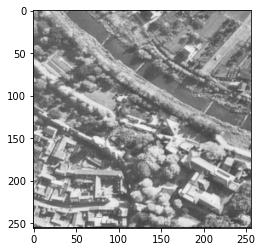

In [15]:
image = cv.imread("aerial.png", cv.IMREAD_GRAYSCALE)
plt.imshow(image,cmap = "gray", vmin=0,vmax=255)

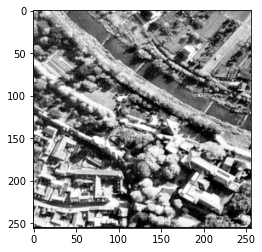

In [16]:
output = HistogramEqualization(image)

plt.imshow(output,cmap = "gray", vmin=0,vmax=255)

In [5]:
cv.imwrite("output.png",output)

True

In [7]:
A = np.array([[3,4,2,0,0],
             [1,1,4,0,0],
             [0,2,4,1,1],
             [0,0,1,4,2],
             [0,0,1,2,5]])
print(FindCDF(FindPDF(A)))

[[0.        ]
 [0.36      ]
 [0.6       ]
 [0.76      ]
 [0.8       ]
 [0.96000004]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.  